# ERCPy: Holography demonstration notebook

#### by Vadim Migunov
Ernst Ruska-Centre for Microscopy and Spectroscopy with Electrons,
Research Centre Juelich, Germany,
v.migunov@fz-juelich.de

### Absract:
The notebook demonstrates usage of holography module of ERCPy package

## Preamble:

In [2]:
import ercpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import hyperspy.api as hs

#### Plotting outside the notebook to enable interactions with user:

In [5]:
%pylab qt

Populating the interactive namespace from numpy and matplotlib


## Loading data:

In [3]:
holo1_obj = hs.load('holo_0V.dm3')

#### Plotting:

In [6]:
holo1_obj.plot()

#### Extracting numeric data only:

In [5]:
holo1 = holo1_obj.data

In [6]:
holo2_obj = hs.load('holo_5V.dm3')
holo2 = holo2_obj.data

In [7]:
ref_obj = hs.load('ref.dm3')
ref = ref_obj.data

## Preparing data:

### Removing dud pixels:

In [8]:
(holo1dr, duds1) = ercpy.rm_duds(holo1)
(holo2dr, duds2) = ercpy.rm_duds(holo2)
(ref_dr, duds_r) = ercpy.rm_duds(ref)

The number of pixels changed = 358
The number of pixels changed = 309
The number of pixels changed = 282


#### Checking where were dud pixels located:

In [10]:
plt.imshow(duds1)

## Reconstructing holograms:

In [12]:
(wave1, phase1, amp1, parameters1) = ercpy.holo_reconstruct(holo1dr, ref, show_phase=True)

press
release
Sideband range in pixels

/Users/vadim/anaconda/lib/python2.7/site-packages/matplotlib/backend_bases.py:2399: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)



98 146 292
Choose Sideband size  pixel = 146
Sideband Size in pixels
146


### Exploring results:

In [13]:
plt.imshow(amp1, vmin=0, vmax=1)

In [14]:
parameters1

(1060.8333333333335,
 740.83333333333348,
 1188.8333333333335,
 890.16666666666674,
 146)

In [15]:
wave1.shape

(146, 146)

In [16]:
wave1.dtype

dtype('complex128')

### Unwrapping Phase:

In [17]:
phase1_u = ercpy.unwrap(phase1)

In [18]:
plt.imshow(phase1_u)

## Aligning holograms:

There are several methods to align holograms:
1. **FFT cross correlation based alignment (image registartion).**
Fast alignment tool, however may require some additional preprocessing to achieve best results.

2. **Real space cross correlation based alignment.**
It is slow but generally is more reliable. It should be used for small (approx. 100x100 px$^2$) images or ROIs only. In the present time this method is not tested and shoudl be used only for your own risk.

3. **Feducial marker alignment.**
Is very robast interactive tool for alignment. It relies on user to pic same features in the images to be aligned. Idealy should be used not on full images but on ROI, since the precission shouldl be higher. Multiple marker alignment will be added in future.

4. **Manual alignment.**
Relies on user to provide alignemnt coordinates. This is teh fastetst and the moste apropriate alignment tool )).

In the follwoing only options 1, 3 and 4 are presented.

The alignemnt is done using **mtools.algn_img()** function which takes two images as main arguments and a number of optional parameters. See help of teh function for detailed description. Among main and usefull parameters are:

* method = 'imgreg', 'xcorr', 'feducial', 'manual'.
* roi = boolean; Enables or disables ROI for alignemnt.
* sb_filtering = boolean; Enables of filtering out of sidebands.


### 1. FFT based x-corr alignment (method='imgreg'):

In [24]:
(holo2_algn, xyshift) = ercpy.align_img(holo1dr, holo2dr, method='imgreg', sb_filtering=True, filt_size=100, roi=True, show='diff')

press
release
[ 0.25  8.75]
xydrift = 8, 0


### 3. Feducial marker alignment (method='feducial'):

In [25]:
(holo2_algn, xyshift) = ercpy.align_img(holo1dr, holo2dr, method='feducial', sb_filtering=True, filt_size=100, roi=True, show='diff')

press
release
press
release
press
release
xydrift = 11, -1


### 4. Manual alignment (method='manual', manualxy=(x, y)):

In [26]:
(holo2_algn, xyshift) = ercpy.align_img(holo1dr, holo2dr, method='manual', sb_filtering=False, roi=False, show='diff', manualxy=(10, 1))

xydrift = 10, 1


In [27]:
(ref_algn, xyshift) = ercpy.align_img(holo1dr, ref_dr, method='manual', sb_filtering=False, roi=False, show=False, manualxy=xyshift)

xydrift = 10, 1


## Reconstructing 2nd hologram using same parameters:

In [28]:
(wave2, phase2, amp2, parameters2) = ercpy.holo_reconstruct(holo2_algn, ref_algn, show_phase=True, rec_param=parameters1)

## Calculating phase difference:

In [29]:
wave_d = wave2/wave1

In [30]:
phase_d = np.angle(wave_d)

In [31]:
plt.imshow(phase_d)

In [32]:
phase_du = ercpy.unwrap(phase_d)

#### Plotting unwrapped phase difference inside the notebook:

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


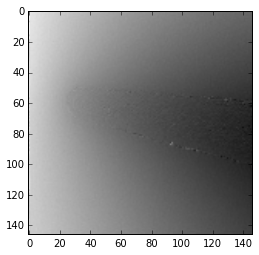

In [35]:
plt.imshow(phase_du)

#### Making a contour plot:

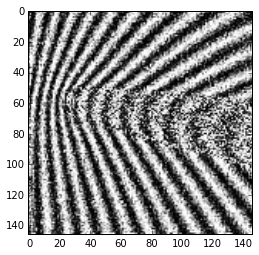

In [36]:
plt.imshow(np.cos(phase_du*4))